# Práctica entregable - Aprendizaje no supervisado: Agrupamiento
- Grandal del Río, Iago
- Güeto Sandá, Marcos


## Importar dependencias

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
fashion_mnist_labels = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


## Carga de datos

In [3]:
import utils.mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# suffle
indices = np.random.permutation(len(y_train))  
X_train, y_train = X_train[indices], y_train[indices]

indices = np.random.permutation(len(y_test))  
X_test, y_test = X_train[indices], y_test[indices]


## Análisis exploratorio y preprocesado

In [4]:
def plot_objects_images(images: np.ndarray, labels: np.ndarray):
    """
    Plot images with class labels.
    
    Parámetros:
    images : numpy.ndarray 
        Array if images 
    labels : numpy.ndarray
        Array of labels


    Returns
    ---
    None
    """
    
    indexes = {label: i for i, label in enumerate(labels)}
    indexesSorted = [indexes[label] for label in range(10)]

    plt.figure(figsize=(10, 5))
    
    for idx, random_index in enumerate(indexesSorted):
        plt.subplot(2, 5, idx + 1)
        plt.imshow(images[random_index], cmap = "gray")
        plt.axis("off")
        plt.title(f"{fashion_mnist_labels[labels[random_index]]}")

    plt.show()

import matplotlib.pyplot as plt
from collections import Counter

def plot_label_counts(labels):
    counts = Counter(labels)  # Count occurrences of each label
    classes, frequencies = zip(*counts.items())  # Unpack class names and frequencies
    
    plt.figure(figsize=(8, 5))
    plt.bar(classes, frequencies)
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.title("Class Distribution")
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.show()


En primer lugar realizaremos un pequeño análisis exploratorio de los datos para conocer los datos con los que vamos a tratar. Como podemos observar se trata de un conjunto de imágenes de 10 clases en los que cada clase es una imagen de una prenda de ropa diferente. A simple vista se puede ver como hay clases más similares entre sí que otras. Por ejemplo la clase 0 es más similar a la 4 que a la 7.

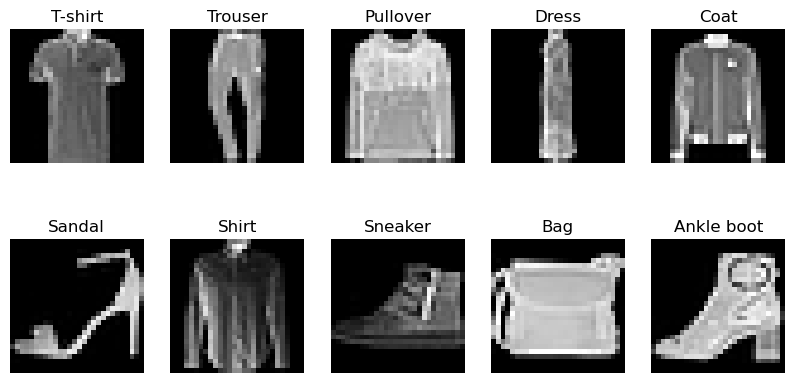

In [5]:
X_images = X_train.reshape(-1, 28, 28)
X_test= X_test.reshape(-1, 28, 28);

plot_objects_images(X_images, y_train)

A continuación vemos el número de instancias de cada clase. Se puede observar que el número de instancias de cada clase es similar al de las otras clases, tanto en test como en entrenamiento, por lo que eso no será un problema a la otra de tratar los datos.

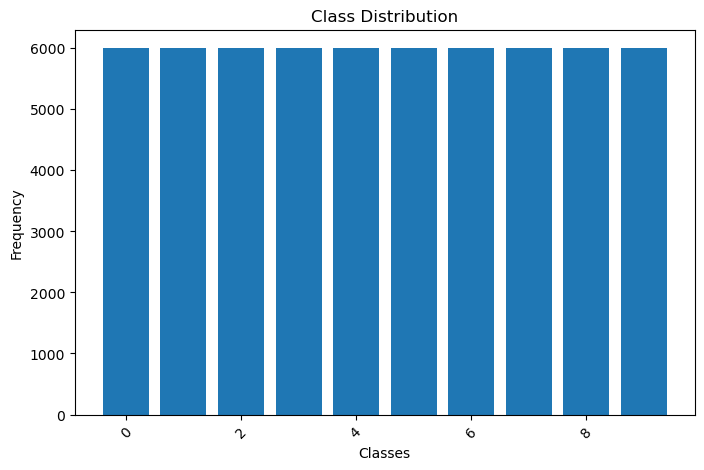

In [6]:
# Example list of labels
plot_label_counts(y_train)


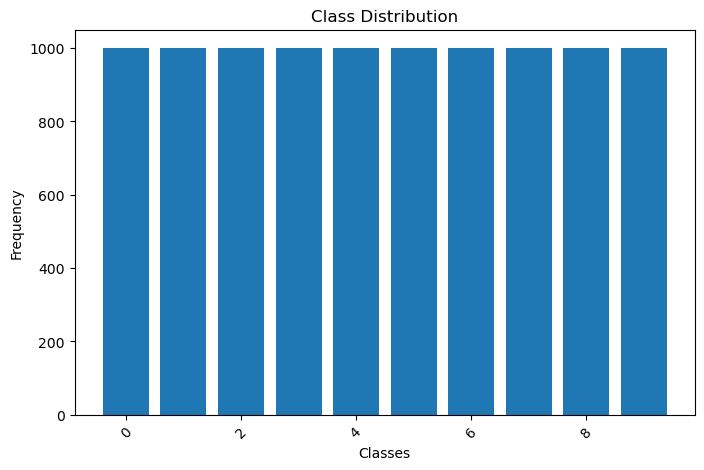

In [7]:
plot_label_counts(y_test)

In [8]:
print(f"Max before normalize: {max(X_train[0].flatten())}")
X_train = X_train / 255 
X_test = X_test / 255 
print(f"Max after normalize: {max(X_train[0].flatten())}")

Max before normalize: 254
Max after normalize: 0.996078431372549


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


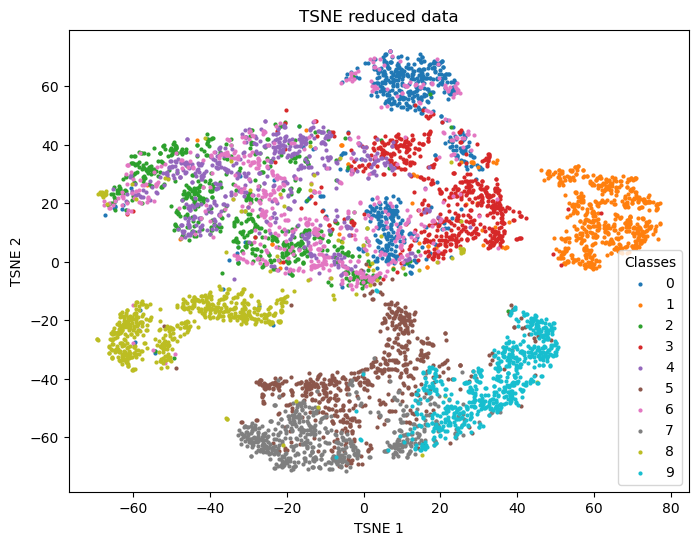

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA



subset = 6000
x_subset, y_subset = X_train[:subset], y_train[:subset]

pca = PCA(n_components=25, random_state=42)
x_transformed = pca.fit_transform(x_subset)

# apply tsne to visualize the data on 2d
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(x_subset)

# plot the tsne transformed data
unique_labels = np.unique(y_subset)
plt.figure(figsize=(8, 6))
for label in unique_labels:
    indices = y_subset == label
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label= label, s=4)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE reduced data")
plt.legend(title="Classes", loc="best")  
plt.show()


Se ven 4 grupos en la gráfica:
-5, 7 y 9 que son zapatos 
-8, objetos
-1, pantalones
-Resto, camisetas: 

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.datasets as skdata
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, v_measure_score

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

def plot_rand_scores_multiple_pca(x, gt, max_k=15, n_components_list=[5, 15, 50, 100], random_state=42):
    """
    Computes and plots rand Scores for clustering with varying k
    for multiple PCA variance levels.

    Parameters:
    - x (array-like): Input data for clustering.
    - gt (array-like): Ground truth labels.
    - max_k (int): Maximum number of clusters to evaluate (default=15).
    - pca_variances (list): List of explained variance ratios for PCA (default=[1.0, 0.95, 0.90, 0.85]).
    - random_state (int): Random state for reproducibility (default=42).
    """

    plt.figure(figsize=(10, 6))

    all_rand_scores = []
    
    for n_components in reversed(n_components_list):
        # Apply PCA 
        if n_components == -1:
            x_transformed = x
        else:
            pca = PCA(n_components=n_components)
            x_transformed = pca.fit_transform(x)
       

        rand_scores = np.zeros(max_k - 1)

        for k in range(2, max_k + 1):
            dbscan = KMeans(n_clusters=k, random_state=random_state)
            kmeans.fit(x_transformed)
            rand_scores[k - 2] = metrics.rand_score(gt, kmeans.labels_)

        # Store silhouette scores for dynamic y-limits
        all_rand_scores.append(rand_scores)

        # Plot results
        plt.plot(np.arange(2, max_k + 1), rand_scores, marker='o', linestyle='-', label=f"PCA n components: {n_components}",)

 

    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Rand Score')
    plt.title('Rand Scores for Different PCA Variance Levels')
    plt.legend()
    plt.grid(True)
    plt.show()

# plot_rand_scores_multiple_pca(x_subset, y_subset, max_k=10, n_components_list=[5, 15, 50, 100, -1], random_state=42)

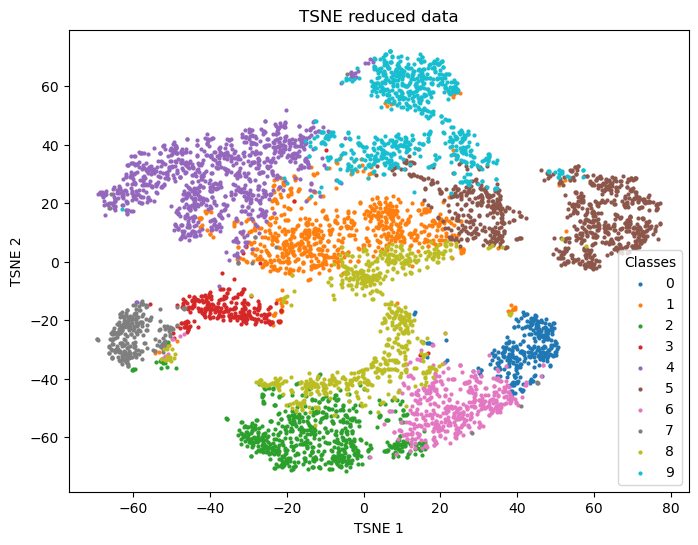

In [12]:


kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_transformed)

plt.show() #visualize the data on 2d

# plot the tsne transformed data
unique_labels = np.unique(kmeans.labels_)
plt.figure(figsize=(8, 6))
for label in unique_labels:
    indices = kmeans.labels_ == label
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label= label, s=4)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE reduced data")
plt.legend(title="Classes", loc="best")
plt.show()


In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix, silhouette_score, rand_score, v_measure_score

def evaluate_clustering(x, cluster_labels, gt_labels):
    """
    Evaluate clustering performance by computing the confusion matrix and several clustering metrics.
    
    Parameters:
        x (array-like): The dataset (features) used in clustering.
        cluster_labels (array-like): Predicted cluster labels for each sample.
        gt_labels (array-like): Ground truth labels for each sample.
    
    Returns:
        dict: A dictionary with keys:
            - "confusion_matrix": Confusion matrix comparing ground truth and cluster labels.
            - "silhouette_score": Silhouette score of the clustering (or None if only one cluster exists).
            - "inertia": Sum of squared distances of samples to their cluster centroids.
            - "rand_score": Rand index score.
            - "v_measure": V-measure score.
    """
    # Compute the confusion matrix (using ground truth as y_true and predicted as y_pred)
    cm = confusion_matrix(gt_labels, cluster_labels)
    
    # Compute the silhouette score if there are at least 2 clusters
    unique_clusters = np.unique(cluster_labels)
    if len(unique_clusters) > 1:
        sil_score = silhouette_score(x, cluster_labels)
    else:
        sil_score = None  # silhouette_score is undefined for a single cluster
    
    # Compute inertia: for each cluster, calculate the sum of squared distances to its centroid.
    x = np.array(x)
    cluster_labels = np.array(cluster_labels)
    
    
    # Compute the Rand score comparing ground truth and predicted labels
    r_score = rand_score(gt_labels, cluster_labels)
    
    # Compute the V-measure score
    v_measure = v_measure_score(gt_labels, cluster_labels)
    
    return {
        "confusion_matrix": cm,
        "silhouette_score": sil_score,
        "rand_score": r_score,
        "v_measure": v_measure
    }



In [14]:
from scipy.stats import mode

def assign_labels_to_clusters(y, clusters):
    labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        labels[mask] = mode(y[mask], keepdims=True)[0]
    return labels

In [15]:
import seaborn as sns

def plot_confusion_matrix(cm, class_names=fashion_mnist_labels.values(), title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plot a confusion matrix using Seaborn's heatmap.
    
    Parameters:
        cm (ndarray): The confusion matrix to plot.
        class_names (list, optional): List of class names to label axes. Defaults to None.
        title (str): Title for the plot.
        cmap: Colormap for the plot.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=class_names if class_names is not None else "auto",
                yticklabels=class_names if class_names is not None else "auto")
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


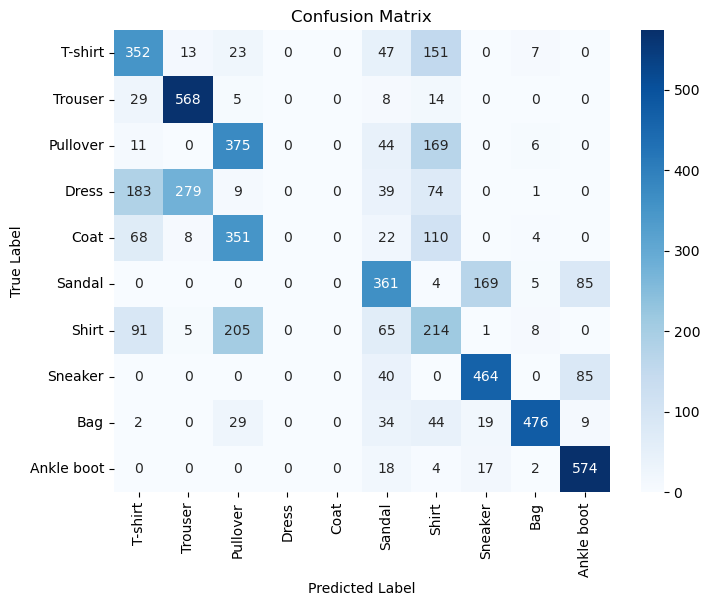

In [16]:
kmeans_labels = assign_labels_to_clusters(y_subset, kmeans.labels_)
kmeans_results = evaluate_clustering(x_transformed, kmeans_labels, y_subset)
plot_confusion_matrix(kmeans_results["confusion_matrix"])

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def get_most_confused_classes(cm):
    """
    Given a confusion matrix, returns a dictionary mapping each true class
    to the predicted class with the highest non-diagonal count.
    """
    most_confused = {}
    for i in range(cm.shape[0]):
        row = np.copy(cm[i])
        row[i] = -1  # ignore correct predictions
        most_confused_class = int(np.argmax(row))
        most_confused[i] = most_confused_class
    return most_confused
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import math

def plot_confused_pairs_grid(most_confused, X_images, y_true, class_names=None):
    """
    Plots confused pairs in a 4-column grid.
    
    Each pair consists of:
      - Left: A representative image from the true class.
      - Right: A representative image from the most confused class.
      
    Two pairs are displayed per row.
    
    Parameters:
        most_confused (dict): Mapping of true class -> most confused class.
        X_images (array-like): Array of images.
        y_true (array-like): True labels corresponding to X_images.
        class_names (dict, optional): Mapping from class index to human-readable names.
    """
    # Sort the mapping for consistent ordering.
    pairs = sorted(most_confused.items(), key=lambda x: x[0])
    num_pairs = len(pairs)
    num_rows = math.ceil(num_pairs / 2)
    
    # Create a grid with 4 columns (2 pairs per row)
    fig, axes = plt.subplots(num_rows, 4, figsize=(8, num_rows))
    # Ensure axes is 2D even if there's only one row.
    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)
    
    for i, (true_class, confused_class) in enumerate(pairs):
        row = i // 2
        pair_position = i % 2  # 0 for first pair in row, 1 for second pair in row
        col_true = pair_position * 2      # First column for the true class image.
        col_conf = col_true + 1             # Next column for the confused class image.
        
        # Retrieve a representative image for the true class.
        true_indices = np.where(np.array(y_true) == true_class)[0]
        if true_indices.size > 0:
            idx_true = true_indices[0]
        else:
            idx_true = None
        
        # Retrieve a representative image for the confused class.
        confused_indices = np.where(np.array(y_true) == confused_class)[0]
        if confused_indices.size > 0:
            idx_confused = confused_indices[0]
        else:
            idx_confused = None
        
        # Plot true class image.
        ax_true = axes[row, col_true]
        if idx_true is not None:
            ax_true.imshow(X_images[idx_true], cmap='gray')
            label_true = class_names[true_class] if class_names and true_class in class_names else true_class
            ax_true.set_title(f"True: {label_true}")
        else:
            ax_true.text(0.5, 0.5, "No sample", ha='center', va='center')
            ax_true.set_title(f"True: {true_class}")
        ax_true.axis('off')
        
        # Plot confused class image.
        ax_conf = axes[row, col_conf]
        if idx_confused is not None:
            ax_conf.imshow(X_images[idx_confused], cmap='gray')
            label_conf = class_names[confused_class] if class_names and confused_class in class_names else confused_class
            ax_conf.set_title(f"Confused: {label_conf}")
        else:
            ax_conf.text(0.5, 0.5, "No sample", ha='center', va='center')
            ax_conf.set_title(f"Confused: {confused_class}")
        ax_conf.axis('off')
    
    # If the number of pairs is odd, hide the extra subplots in the last row.
    if num_pairs % 2 != 0:
        for col in range(2, 4):
            axes[num_rows - 1, col].axis('off')
    
    plt.tight_layout()
    plt.show()







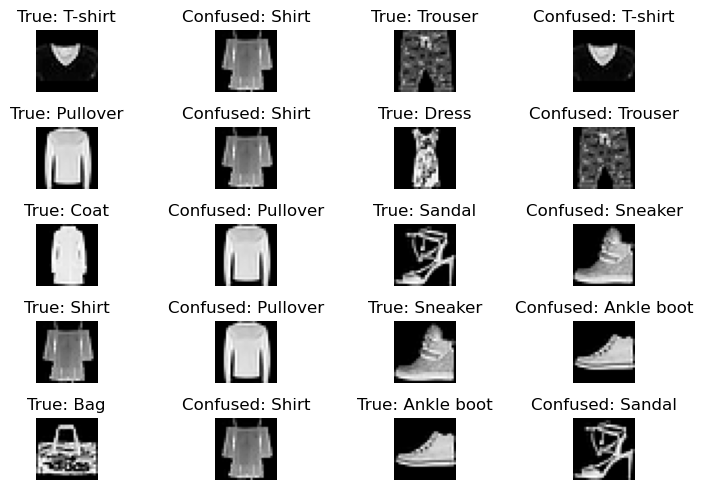

In [18]:
plot_confused_pairs_grid(get_most_confused_classes(kmeans_results["confusion_matrix"]), X_images, y_subset, class_names=fashion_mnist_labels)

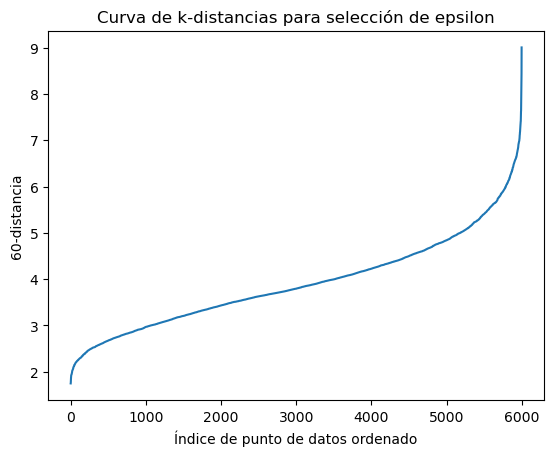

In [19]:
from sklearn.neighbors import NearestNeighbors 

minPts = 2 * x_transformed.shape[1]

nn = NearestNeighbors(n_neighbors=minPts)
nn.fit(x_transformed)
distances, indices = nn.kneighbors(x_transformed)

k_distances = distances[:, -1]

k_distances = np.sort(k_distances)

plt.plot(k_distances)
plt.xlabel("Índice de punto de datos ordenado")
plt.ylabel(f"{minPts}-distancia")
plt.title("Curva de k-distancias para selección de epsilon");

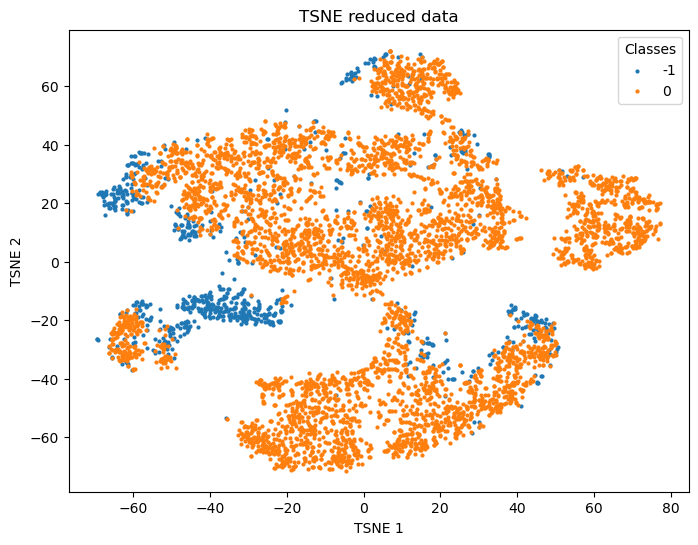

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4, min_samples=minPts) # EPS
dbscan_clusters = dbscan.fit_predict(x_transformed)

plt.show() #visualize the data on 2d

# plot the tsne transformed data
unique_labels = np.unique(dbscan_clusters)
plt.figure(figsize=(8, 6))
for label in unique_labels:
    indices = dbscan_clusters == label
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label= label, s=4)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE reduced data")
plt.legend(title="Classes", loc="best")
plt.show()


In [21]:
y_subset

array([0, 1, 6, ..., 9, 4, 6], dtype=uint8)

c:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


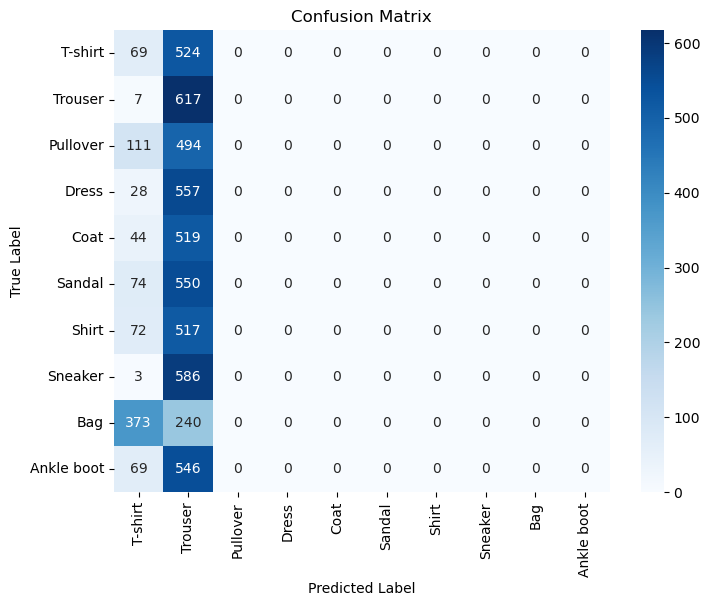

In [22]:
dbscan_labels = assign_labels_to_clusters(y_subset, dbscan_clusters)
dbscan_results = evaluate_clustering(x_transformed, dbscan_labels, y_subset)
plot_confusion_matrix(dbscan_results["confusion_matrix"])

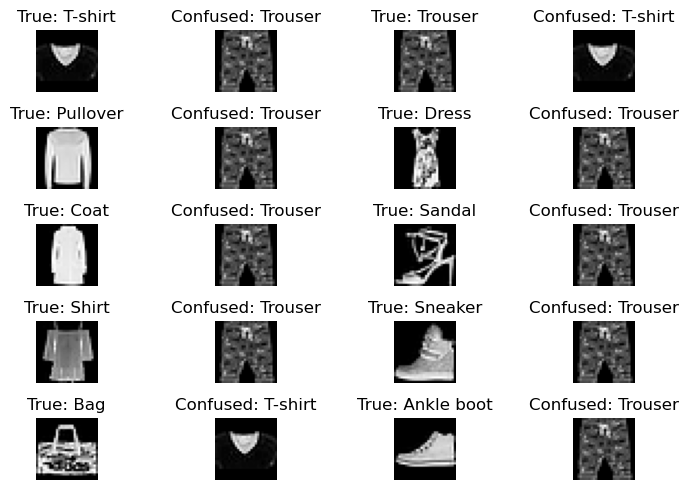

In [23]:
plot_confused_pairs_grid(get_most_confused_classes(dbscan_results["confusion_matrix"]), X_images, y_subset, class_names=fashion_mnist_labels)

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist



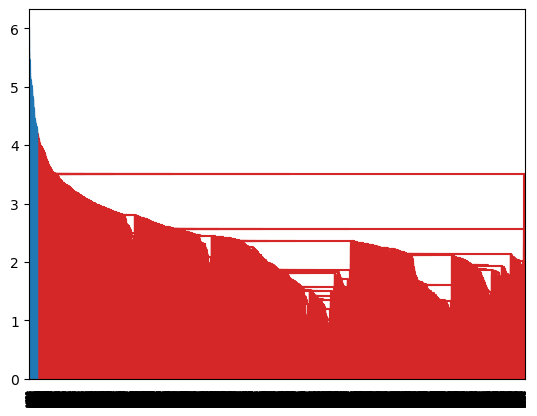

In [30]:
dm = pdist(x_transformed)
z = linkage(dm)
dn = dendrogram(z)
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster, ward


In [ ]:
hierarchy_clusters = fcluster(ward(dm), t=10, criterion='maxclust')

c:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


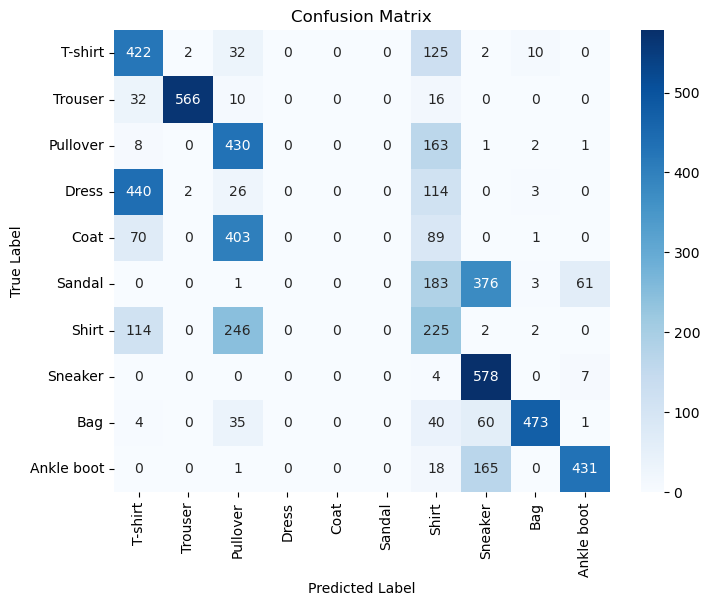

In [36]:
hierarchy_labels = assign_labels_to_clusters(y_subset, hierarchy_clusters)
hierarchy_results = evaluate_clustering(x_transformed, hierarchy_labels, y_subset)
plot_confusion_matrix(hierarchy_results["confusion_matrix"])

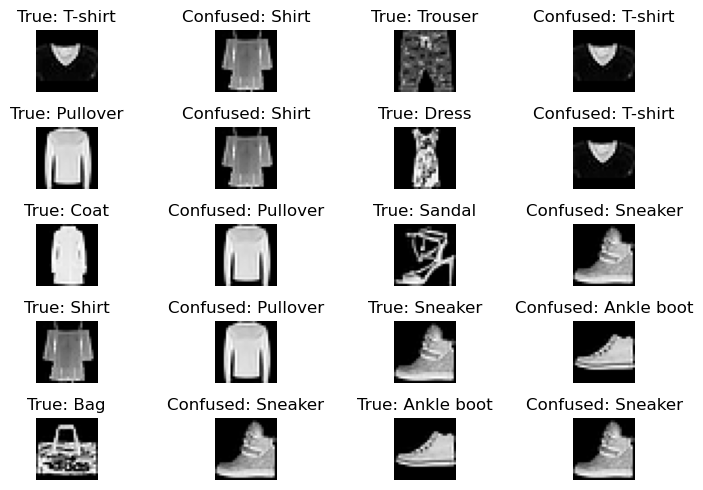

In [37]:
plot_confused_pairs_grid(get_most_confused_classes(hierarchy_results["confusion_matrix"]), X_images, y_subset, class_names=fashion_mnist_labels)

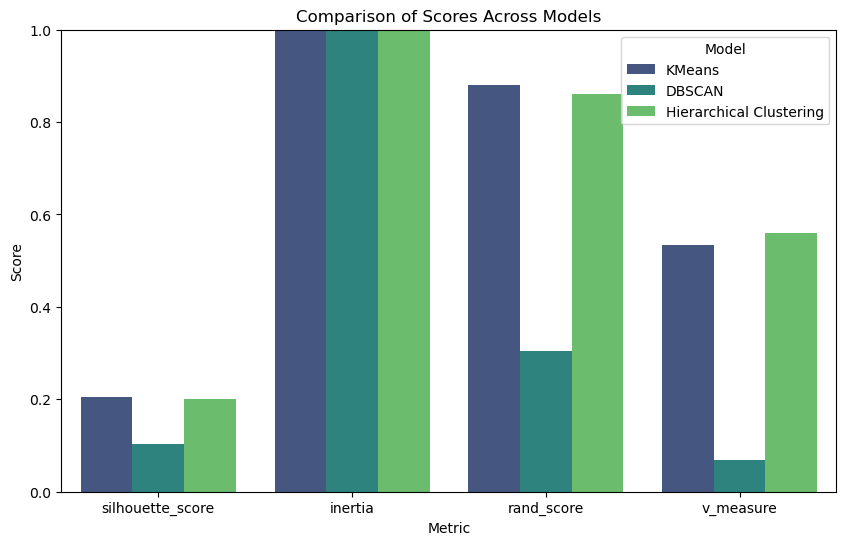

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_model_scores(score_dicts, model_names=None, title="Comparison of Scores Across Models"):
    """
    Plots a grouped bar plot to compare scores between multiple models.
    
    Parameters:
    - score_dicts: List of dictionaries, where each dictionary contains scores for different metrics.
    - model_names: List of names for the models (optional). If None, models will be named 'Model 1', 'Model 2', etc.
    - title: Title of the plot (default: 'Comparison of Scores Across Models')
    """
    # Assign default model names if not provided
    if model_names is None:
        model_names = [f'Model {i+1}' for i in range(len(score_dicts))]
    
    # Convert dictionaries into a DataFrame
    data = []
    for model_name, score_dict in zip(model_names, score_dicts):
        for metric, score in score_dict.items():
            if metric != "confusion_matrix":
                data.append({'Model': model_name, 'Metric': metric, 'Score': score})

    df = pd.DataFrame(data)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Score', hue='Model', data=df, palette='viridis')

    # Customize the plot
    plt.title(title)
    plt.ylabel('Score')
    plt.xlabel('Metric')
    plt.ylim(0, 1)  # Assuming scores are between 0 and 1
    plt.legend(title='Model')

    # Show the plot
    plt.show()


plot_model_scores([kmeans_results, dbscan_results, hierarchy_results], model_names=["KMeans", "DBSCAN", "Hierarchical Clustering"])